In [116]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [117]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
sigmoid(3)

0.9525741268224334

In [118]:
def tanh(x):
    numerator = 1-np.exp(-2*x)
    denominator = 1+np.exp(-2*x)
    return numerator/denominator
tanh(3)

0.9950547536867306

In [119]:
def ReLU(x):
    if x<0:
        return 0
    else:
        return x
    
ReLU(3)

3

In [120]:
def leakyReLU(x,alpha=0.01):
    if x<0:
        return (alpha*x)
    else:
        return x
leakyReLU(3,0.01)

3

*****Forward Propagation*****

**def forward_prop(X):

    z1=np.dot(X,Wxh)+bh
    a1=sigmoid(z1)
    z2=np.dot(a1,Why)+bh
    y_hat=sigmoid(z2)
    return y_hat**

> Forward propagation is cool, isn't it? But how do we know whether the output generated
> by the neural network is correct? We define a new function called the cost function ( ), also
> known as the loss function ( ), which tells us how well our neural network is performing.
> There are many different cost functions. We will use the mean squared error as a cost
> function, which can be defined as the mean of the squared difference between the actual
> output and the predicted output:

# gradient descent.

This implies
weights = weights -α * gradients.

What is ? It is called the learning rate.
* If the learning rate is small, then we take a small step downward and our gradient descent can be slow.
* If the learning rate is large, then we take a large step and our gradient descent will be fast, but we might fail to reach the global minimum and become stuck at a local minimum. 
* So,the learning rate should be chosen optimally:

LETS COMPLETE THE OUR FIRST NEURAL NETWORK STEP -BY -STEP:

# FISTRLY IMPORT THE LIBRARIES

In [121]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
    

# PREPARE THE DATA IN THE FORM OF XOR

In [122]:
X=np.array([[0,1],[1,0],[1,1],[0,0]])
y=np.array([[1],[1],[0],[0]])

# Define the number of nodes in each layer

In [123]:
num_input=2
num_hidden=5
num_output=1

# Initialize the weights and bias randomly. First, we initialize the input to hidden layer weights:

In [124]:
Wxh = np.random.randn(num_input,num_hidden)
bh = np.zeros((1,num_hidden))

# Now, we initialize the hidden to output layer weights:

In [125]:
Why=np.random.randn(num_hidden,num_output)
by=np.zeros((1,num_output))

# Define the sigmoid activation function

In [126]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Define the derivative of the sigmoid function:

In [127]:
def sigmoid_derivative(z):
    
    return np.exp(-z)/((1+np.exp(-z))**2)

# Define the forward propagation:

In [128]:
def forward_prop(X,Wxh,Why):
    z1 = np.dot(X,Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)
    return z1,a1,z2,y_hat

# Define the backward propagation:

In [129]:
def backword_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(X.T, delta1)
    return dJ_dWxh, dJ_dWhy


# Define the cost function:

In [130]:
def cost_function(y,y_hat):
    J=0.5*sum((y-y_hat)**2)
    return J

# Set the learning rate and the number of training iterations:

In [131]:
alpha = 0.01
num_iterations = 5000

# Now, let's start training the network with the following code:

In [132]:
cost =[]
for i in range(5000):
    z1,a1,z2,y_hat = forward_prop(X,Wxh,Why)
    dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)
#update weights
    Wxh = Wxh -alpha * dJ_dWxh
    Why = Why -alpha * dJ_dWhy
#compute cost
    c = cost_function(y, y_hat)
    cost.append(c)


# Plot the cost function:

Text(0, 0.5, 'Cost')

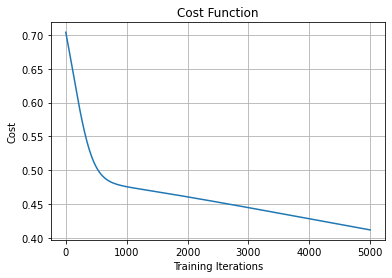

In [133]:
plt.grid()
plt.plot(range(5000),cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

**As you can observe in the following plot, the loss decreases over the training iterations:**